In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from sklearn.preprocessing import  LabelEncoder
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
import os
print(os.listdir("../input"))
from sklearn.preprocessing import StandardScaler ,minmax_scale
from sklearn.linear_model import LogisticRegression,RidgeClassifier
%matplotlib notebook
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from  sklearn import  datasets
from sklearn.ensemble import voting_classifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
# Any results you write to the current directory are saved as output.

C:\Users\Elhmadany\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input'

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

FileNotFoundError: File b'../input/test.csv' does not exist

In [24]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

In [25]:
all_data = [X_train, test_df]

In [26]:
for dataset in all_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
X_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Capt          1
Sir           1
Ms            1
Don           1
Jonkheer      1
Countess      1
Mme           1
Name: Title, dtype: int64

In [27]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [28]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in all_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [ ]:
X_train.head(5)

In [29]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    
    df.plot(kind='bar',stacked=True, figsize=(10,5))

<IPython.core.display.Javascript object>


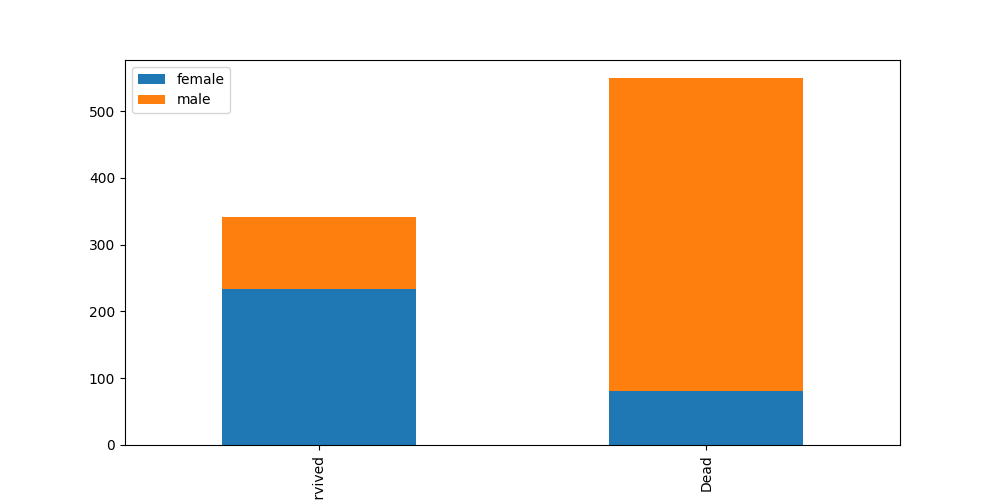

<IPython.core.display.Javascript object>


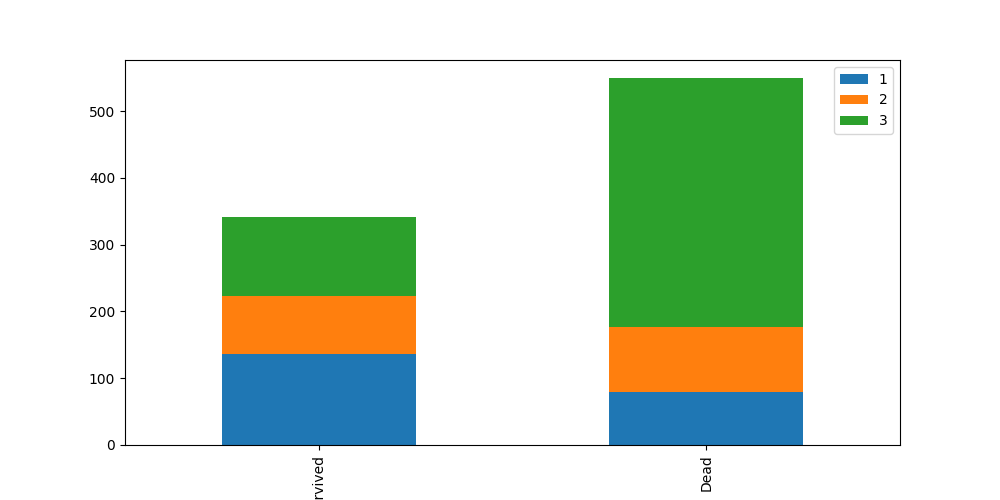

KeyError: 'Title'

In [30]:
bar_chart('Sex')
bar_chart('Pclass')
bar_chart('Title')

In [ ]:
print( train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean() )


In [ ]:
print( train_df[["Fare","Survived"]].groupby(["Fare"], as_index = False).mean() )


In [ ]:
print( train_df[["Embarked","Survived"]].groupby(["Embarked"], as_index = False).mean() )


In [ ]:
print( train_df[["Cabin","Survived"]].groupby(["Cabin"], as_index = False).mean() )


In [ ]:
for data in all_data:
    data['family_size'] = data['SibSp'] + data['Parch'] +1
    

In [ ]:
train_df['family_size'] = data['SibSp'] + data['Parch'] +1

In [ ]:
print( train_df[["family_size","Survived"]].groupby(["family_size"], as_index = False).mean() )


In [ ]:
#train_df['family_size']=pd.DataFrame(train_df['family_size'])  

#test_df['family_size']=pd.DataFrame(test_df['family_size'])

In [ ]:
"""def edit(x):
    if x > 4:
        x = 0
    return x"""

In [ ]:
#X_train['family_size']= train_df['family_size'].apply(edit  )

#test_df['family_size']= test_df['family_size'].apply(edit  )

In [ ]:
X_train.head(10)

In [ ]:
#all_data[0] = all_data.drop("Fare","Cabin", axis=1)
#all_data_train=pd.DataFrame(all_data[0])
#all_data_test=pd.DataFrame(all_data[1])

all_data_train=pd.DataFrame(X_train)
all_data_test=pd.DataFrame(test_df)

In [ ]:
all_data_train.head(5)

In [ ]:
all_data_train=all_data_train.drop(["Cabin","SibSp","Parch","Name","PassengerId","Ticket"], axis=1)
all_data_test=all_data_test.drop(["Cabin","SibSp","Parch","Name","Ticket","PassengerId"], axis=1)

In [ ]:
all_data_train.head(10)

In [ ]:
all_data_train["Age"] = all_data_train["Age"].fillna(all_data_train["Age"].median())
all_data_test["Age"] = all_data_test["Age"].fillna(all_data_test["Age"].median())

#all_data_train["Embarked"] = all_data_train["Embarked"].fillna(all_data_train["Embarked"].median())
all_data_train["Fare"] = all_data_train["Fare"].fillna(all_data_train["Fare"].median())
all_data_test["Fare"] = all_data_test["Fare"].fillna(all_data_test["Fare"].median())

#all_data_train["Pclass"] = all_data_train["Pclass"].fillna(all_data_train["Pclass"].mean())
#all_data_test["Pclass"] = all_data_test["Pclass"].fillna(all_data_test["Pclass"].mean())

In [ ]:
LE2 = LabelEncoder()
all_data_train.Sex = LE2.fit_transform(all_data_train.Sex)
all_data_test.Sex = LE2.fit_transform(all_data_test.Sex)


In [ ]:
all_data_train.shape

In [ ]:

dumies= pd.get_dummies(all_data_train.Embarked)
dumies1=pd.get_dummies(all_data_test.Embarked)

In [ ]:
all_data_train=pd.concat([all_data_train,dumies],axis='columns')
all_data_test=pd.concat([all_data_test,dumies1],axis='columns')

In [ ]:
all_data_train.head(5)

In [ ]:
all_data_train=all_data_train.drop(['Embarked'],axis=1)
all_data_test=all_data_test.drop(['Embarked'],axis=1)

In [ ]:
all_data_train.shape

In [ ]:
all_data_train_normalized = minmax_scale(all_data_train)
all_data_test_normalized=minmax_scale(all_data_test)

In [ ]:
all_data_train_normalized=pd.DataFrame(all_data_train_normalized)
all_data_test_normalized=pd.DataFrame(all_data_test_normalized)

In [ ]:

rf_clf = RandomForestClassifier(random_state=0)
rf_parm={'criterion':['gini', 'entropy']}
et_clf = ExtraTreesClassifier(random_state=0)
et_parm={'criterion':['gini', 'entropy']}


logi_clf = LogisticRegression(random_state=0)
logi_parm = {"penalty": ['l1', 'l2'], "C": [0.1, 0.5, 1, 5,6,7,8, 10, 50]}

svm_clf = SVC(random_state=0)
svm_parm = {'kernel': ['rbf', 'poly'], 'C': [0.1, 0.5, 1, 5,8, 10, 50], 'degree': [3, 5, 7], 
            'gamma': ['auto', 'scale']}

dt_clf = DecisionTreeClassifier(random_state=0)
dt_parm = {'criterion':['gini', 'entropy']}

knn_clf = KNeighborsClassifier()
knn_parm = {'n_neighbors':[5, 10, 15, 20], 'weights':['uniform', 'distance'], 'p': [1,2,3,4]}

gnb_clf = GaussianNB()
gnb_parm = {'priors':['None']}

clfs = [logi_clf, svm_clf, dt_clf, knn_clf, gnb_clf,rf_clf,et_clf]
params = [logi_parm, svm_parm, dt_parm, knn_parm, gnb_parm,rf_parm,et_parm]




In [ ]:

for clf_ in clfs:
    #vanilla_scores = cross_val_score(clf_, all_data_train_normalized, Y_train, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf_)
    bagging_scores = cross_val_score(bagging_clf, all_data_train_normalized,Y_train, cv=10,n_jobs=-1)
    #print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]\n".format(clf_.__class__.__name__,vanilla_scores.mean(),vanilla_scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf_.__class__.__name__,bagging_scores.mean(),
                                                                         bagging_scores.std()))
    

In [ ]:
vanilla_scores.std()

In [ ]:
clfs_opt = []
clfs_best_scores = []
clfs_best_param = []
for clf_, param in zip(clfs, params):
    clf = RandomizedSearchCV(clf_, param, cv=5)
    clf.fit(all_data_train_normalized, Y_train)
    clfs_opt.append(clf)
    clfs_best_scores.append(clf.best_score_)
    clfs_best_param.append(clf.best_params_)

In [ ]:
max(clfs_best_scores)

In [ ]:
arg = np.argmax(clfs_best_scores)
clfs_best_param[arg]

In [ ]:
clf3 = svm.SVC(C=5,kernel='rbf', degree=3, gamma='scale') 
clf3.fit(all_data_train_normalized, Y_train)
Y_pre3=clf3.predict(all_data_test_normalized)
Y_pre3 =pd.DataFrame(Y_pre3,columns=['Survived'])

sub5 = pd.concat([test_df['PassengerId'],Y_pre3],axis=1)
sub5.to_csv('sub5.csv',index=False)

In [ ]:
#log=LogisticRegression()
#clf = svm.SVC(kernel='poly') 
#kf=KFold(n_splits=5)

In [ ]:
#scoreLog=cross_val_score(log,all_data_train_normalized,Y_train,cv=kf)
#scoreSVM=cross_val_score(clf,all_data_train_normalized,Y_train,cv=kf)

In [ ]:
#Y_train.shape,all_data_train_normalized.shape,X_train.shape

In [ ]:
#scoreLog.mean(),scoreSVM.mean()


In [ ]:

"""def svc_param_selection(X, y, nfolds):
    kernels = ['linear', 'rbf']
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas,'kernel':kernels}
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_score_,grid_search.best_params_"""

In [ ]:
#svc_param_selection(all_data_train_normalized, Y_train, 5)

In [ ]:
""""
knn=KNeighborsClassifier(n_neighbors=5)
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(all_data_train_normalized, Y_train)""""

In [ ]:
#clf1 = svm.SVC(C=10,kernel='rbf', degree=3, gamma=1) 
#clf2 = svm.SVC(C=5,kernel='rbf', degree=3, gamma=1) 


In [ ]:
#clf1.fit(all_data_train_normalized, Y_train)
#clf2.fit(all_data_train_normalized, Y_train)

In [ ]:
#Y_pre=clf1.predict(all_data_test_normalized)
#Y_pre2=clf2.predict(all_data_test_normalized)

In [ ]:
#Y_pre =pd.DataFrame(Y_pre,columns=['Survived'])

#Y_pre2 =pd.DataFrame(Y_pre2,columns=['Survived'])

In [ ]:
#sub1 = pd.concat([test_df['PassengerId'],Y_pre],axis=1)
#sub2 = pd.concat([test_df['PassengerId'],Y_pre2],axis=1)

In [ ]:
#sub1.to_csv('sub1.csv',index=False)
#sub2.to_csv('sub2.csv',index=False)


In [ ]:
#pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


In [ ]:
#gnb1 = GaussianNB()
#gnb1.fit(all_data_train_normalized, Y_train)

In [ ]:
#scoreGaussian=cross_val_score(gnb1,all_data_train_normalized,Y_train,cv=kf)#

In [ ]:
#scoreGaussian.mean()

In [ ]:
#all_data_train_normalized.shape,all_data_test_normalized.shape

In [ ]:
#y_pre1=gnb1.predict(all_data_test_normalized)

In [ ]:
#y_pre1 =pd.DataFrame(y_pre1,columns=['Survived'])

In [ ]:
#sub = pd.concat([test_df['PassengerId'],y_pre1],axis=1)

In [ ]:
#sub.to_csv('sub.csv',index=False)
